## Análisis de Medicamento para el Asma

### Introducción
--------------------------------------

El presente trabajo muestra un análisis de datos realizado sobre un medicamento para el asma de control difícil (ACD). 
Este medicamento es primer y único medicamento indicado para esta enfermedad y forma parte de los 6 principales medicamentos de alta especialidad que maneja la compañía.

En la actualidad la empresa no tiene un modelo matemático que les ayude a pronosticar las vetas y lo hacen por medio de los datos históricos y la experiencia.

In [832]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
%matplotlib inline
import seaborn as sbn
sbn.set(rc={'figure.figsize':(10, 5)})
from scipy.optimize import minimize
from scipy.optimize import minimize


In [833]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

La información presentada en este documento es a partir de Enero 2017 a Julio 2020, tomando solo las venta por el canal privado.

* **Unidades:** cantidad de unidades desplazadas por distribuidor.

* **Distribuidor:** cuentas que ponen a disposición de pacientes, médicos e instituciones hospitalarias el medicamento.

* **Canal:** Segmento por el cual fueron desplazadas las unidades.

* **Especialidad:**  Especialidades de los médicos que recetaron el medicamento

* **Estado:** Estado en el cual fue recetado o comprado el medicamento.

Nota: La variable “Distribuidor" se cambió a variables numéricas por confidencialidad.



In [855]:
data = pd.read_csv("DATA.csv", encoding = "latin-1",index_col = 0, parse_dates = True)
data.shape

(3072, 5)

In [856]:
data.index = pd.to_datetime(data.index)
data.index.dtype

dtype('<M8[ns]')

In [857]:
data.head(5)

,Unidades,Distribuidor,Canal,Especialidad,Estado
Fecha,,,,,
2017-01-01,2,D,HMO,MEDINT,YUCATAN
2017-01-01,2,D,HMO,MEDINT,YUCATAN
2017-01-01,2,D,HMO,PEDIA,GUANAJUATO
2017-01-01,2,D,HMO,PEDIA,GUANAJUATO
2017-01-01,2,D,HMO,PEDIA,GUANAJUATO


Tenemos 3072 desplazamientos a lo largo de 43 meses (del 1 de Enero del 2017 al 1 de Julio del 2020) y 5 variables

### Desplazamiento de unidades

In [837]:
unidades = pd.read_csv("DATA UNITS.csv", encoding = "latin-1",index_col = 0, parse_dates = True)
unidades.shape

(43, 1)

In [838]:
unidades.index = pd.to_datetime(unidades.index)
unidades.index.dtype

dtype('<M8[ns]')

In [839]:
unidades.describe()

,Unidades
count,43.000000
mean,175.674419
std,80.557498
min,42.000000
25%,92.000000
50%,195.000000
75%,233.000000
max,358.000000


In [840]:
unidades["Unidades"].idxmin()

Timestamp('2017-09-01 00:00:00')

In [841]:
unidades["Unidades"].idxmax()

Timestamp('2018-12-01 00:00:00')

<Figure size 720x360 with 0 Axes>

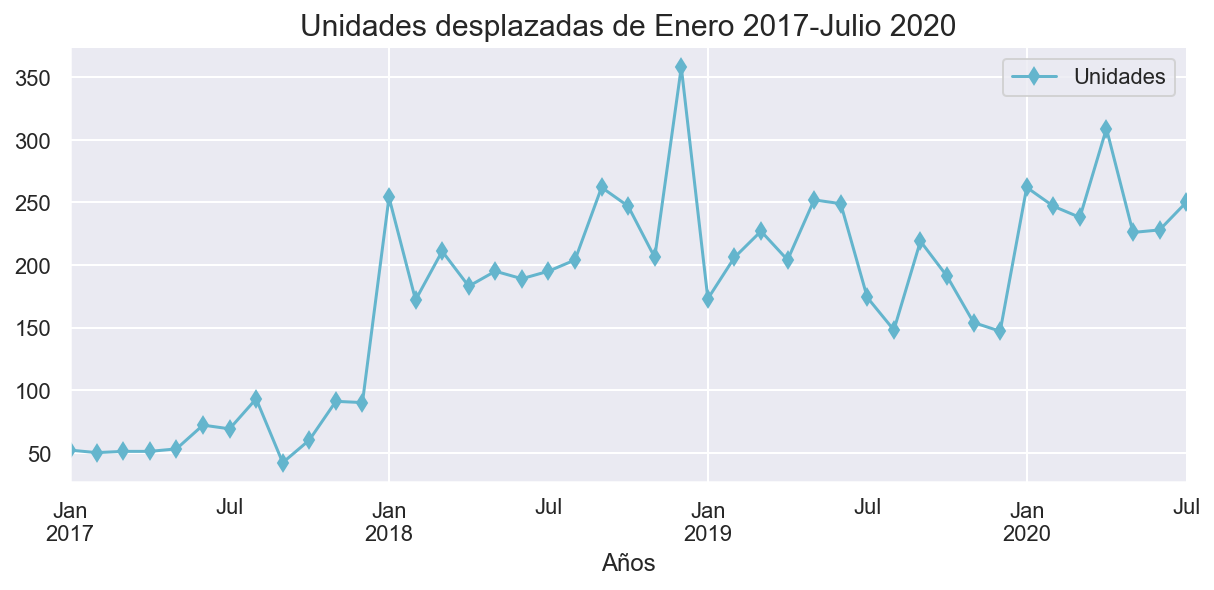

In [425]:
plt.figure(figsize= (10,5))
unidades.plot(marker='d', color="c")
plt.title("Desplazamientos")   # Establece el título del gráfico
plt.xlabel("Años")   # Establece el título del eje x   
plt.title("Unidades desplazadas de Enero 2017-Julio 2020",fontsize=15)
plt.show()


Se puede ver que en Enero del 2018 hay un aumento muy significativo en el desplazamiento del medicamento, esto se da porque en el 2017 no se recibía la información de todos los distribuidores.

Tomando en cuenta todos los años, podemos notar que en Septiembre del 2017 es el mes que se tuvieron menos ventas con 42 unidades y en Diciembre del 2018 fue el máximo de ventas con 358 unidades.

Se tiene un promedio de 175.67 y  una desviación estándar de 80.55.


In [842]:
data["Unidades"].sum()

7554

In [843]:
units = unidades["2018":"2020"]
units.describe()

,Unidades
count,31.000000
mean,218.709677
std,45.897853
min,147.000000
25%,190.000000
50%,211.000000
75%,248.000000
max,358.000000


In [844]:
units.idxmin()

Unidades   2019-12-01
dtype: datetime64[ns]

In [845]:
units.idxmax()

Unidades   2018-12-01
dtype: datetime64[ns]

In [567]:
total=data["Unidades"].sum()
uni1820=units["Unidades"].sum()
resta= total - uni1820
resta

774

In [472]:
resta/total

0.10246227164416204

<Figure size 720x360 with 0 Axes>

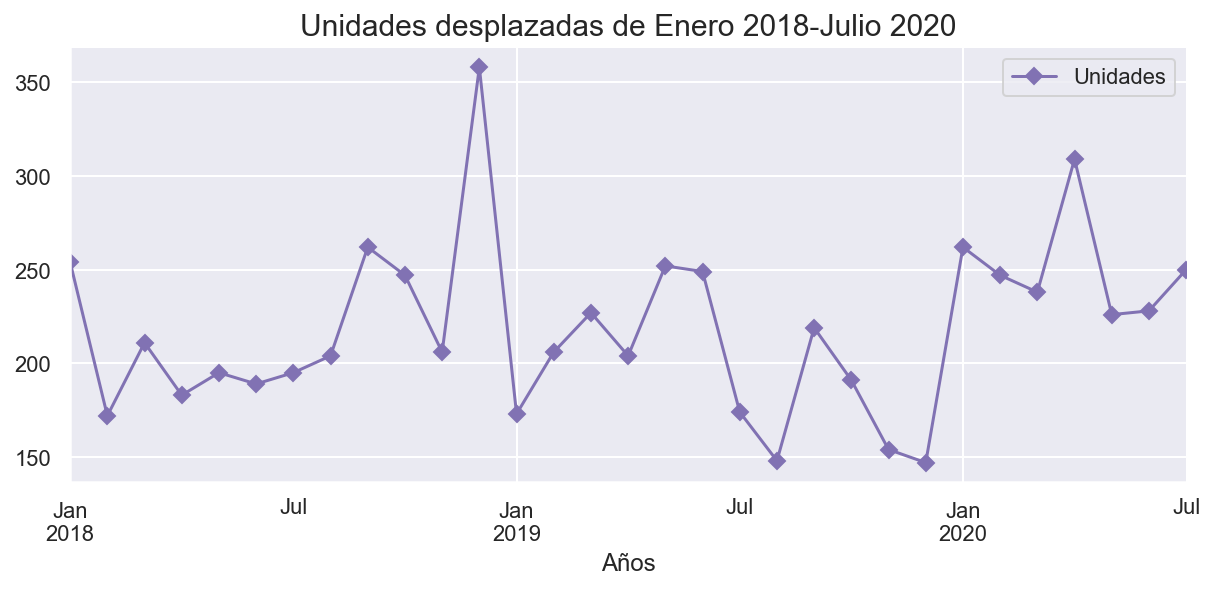

In [479]:
plt.figure(figsize= (10,5))
units.plot(marker='D', color="m")
plt.title("Desplazamientos")   # Establece el título del gráfico
plt.xlabel("Años")   # Establece el título del eje x   
plt.title("Unidades desplazadas de Enero 2018-Julio 2020",fontsize=15)
plt.show()


Para este caso quitamos las piezas del 774 Unidades del 2017 lo cual es el 10.24% del total de unidades desplazadas en los 43 meses.

Notamos que en Diciembre del 2019 es el mes que se tuvieron menos ventas con 147 y Diciembre del 2018 sigue siendo el mes con el máximo de unidades vendidas.

Se tiene un promedio de 218.70 y una desviación estándar de 45.89. Por lo tanto, se hará un mejor análisis con los datos del 2018 al 2020.


#### Estacionalidad

In [846]:
data.index

DatetimeIndex(['2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01',
               '2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01',
               '2017-01-01', '2017-01-01',
               ...
               '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01',
               '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01',
               '2020-07-01', '2020-07-01'],
              dtype='datetime64[ns]', name='Fecha', length=3072, freq=None)

In [847]:
data['Mes'] = data.index.month
data['Año'] = data.index.year

<AxesSubplot:xlabel='Mes', ylabel='Unidades'>

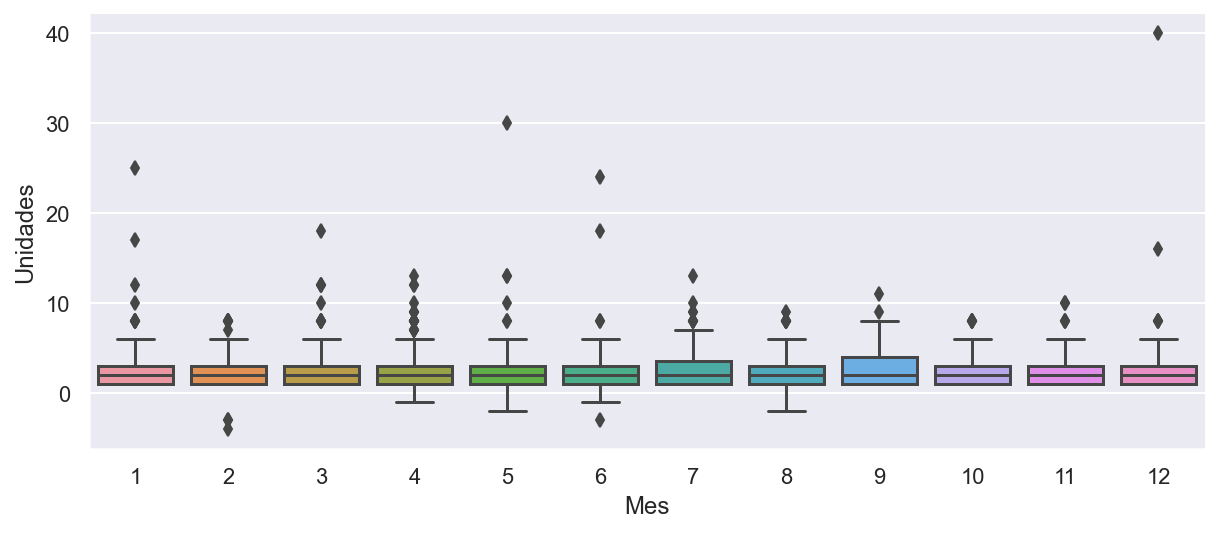

In [508]:
sbn.boxplot(data=data, x = 'Mes', y= 'Unidades')

El diagrama nos confirma que hay estacionalidad anual en los datos, pero los desplazamientos tienen muchos valores atípicos y se puede voer como en diciembre se tiene el máximo de desplzamientos. 

#### Tendencia

Text(0.5, 1.0, 'Desplazamientos anuales')

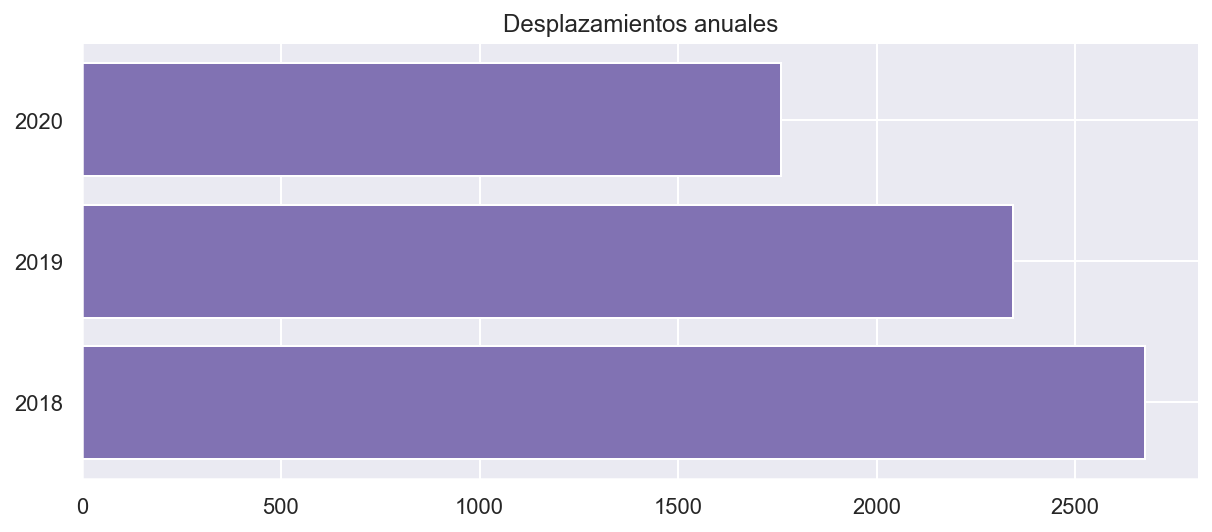

In [848]:
desp = data["Unidades"].resample("M").sum()
desp2019= desp["2018"].sum()
desp2019= desp["2019"].sum()
desp2020= desp["2020"].sum()

x = ['2018','2019','2020']
totales = [desp2018, desp2019,desp2020]
plt.barh(x, totales, color="m")
plt.title("Desplazamientos anuales")

Existe una tendencia decreciente para las ventas de este medicamento, pero cabe destacar que las unidades del 2020 solo llegan al mes de Julio, por lo que esta tendencia pude variar en caso de tener más datos.


Como se tiene el primer semestre del 2020 haremos una análisis por semestre.

Text(0.5, 1.0, 'Venta del 2o Semestre, 2018 - 2020')

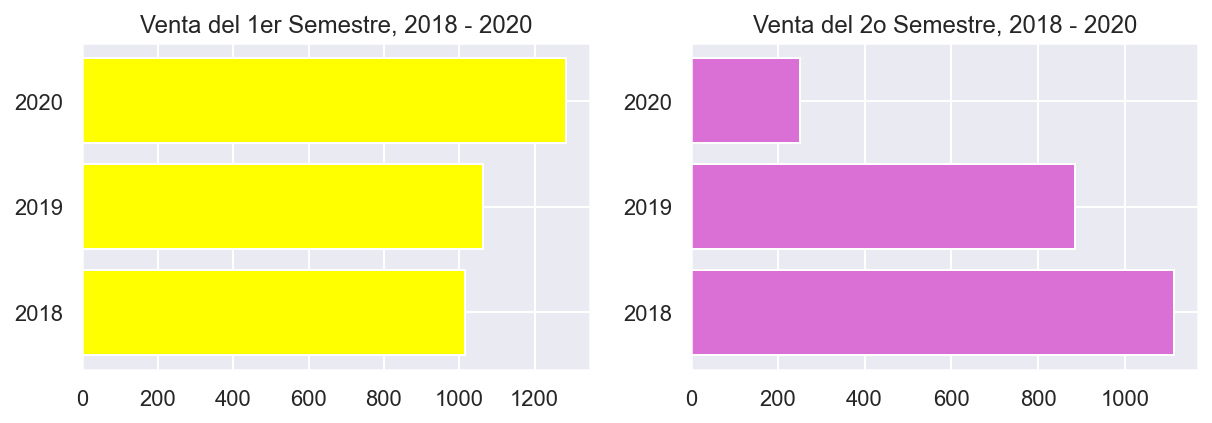

In [696]:
figure, ax = plt.subplots(1, 2, figsize= (10,3))
desp = data["Unidades"].resample("M").sum()
S1_2018= desp["2018-01-01":"2018-06-01"].sum()
S2_2018= desp["2018-07-01":"2018-12-01"].sum()
S1_2019= desp["2019-01-01":"2019-06-01"].sum()
S2_2019= desp["2019-07-01":"2019-12-01"].sum()
S1_2020= desp["2020-01-01":"2020-06-01"].sum()
S2_2020= desp["2020-07-01":"2020-12-01"].sum()

x = ['2018','2019','2020']
totales_S1 = [S1_2018, S1_2019, S1_2020]
totales_S2 = [S2_2018, S2_2019, S2_2020]
ax[0].barh(x, totales_S1, color = "yellow")
ax[1].barh(x, totales_S2, color = "orchid")
ax[0].set_title("Venta del 1er Semestre, 2018 - 2020")
ax[1].set_title("Venta del 2o Semestre, 2018 - 2020")

Gracias a las gráficas podemos decir que en el primer semestre de los años se tiene un crecimiento en las ventas, pero en el segundo semestre de los años las ventas disminuyen, ya que en el 2018 se vendió más en el segundo semestre que en el del 2019 y que en el primer semestre del año.

También podemos notar que el primer semestre del 2020 tiene un crecimiento respecto a los dos semestres del 2019.


### Análisis general de las variables

In [858]:
type(data)

pandas.core.frame.DataFrame

In [859]:
data.dtypes

Unidades         int64
Distribuidor    object
Canal           object
Especialidad    object
Estado          object
dtype: object

In [860]:
units = data["2018":"2020"]

In [861]:
units.columns

Index(['Unidades', 'Distribuidor', 'Canal', 'Especialidad', 'Estado'], dtype='object')

In [862]:
pd.unique(units['Distribuidor'])

array(['A', 'C', 'D', 'F', 'H', 'K', 'L', 'E', 'B', 'M', 'J', 'N', 'G',
       'I'], dtype=object)

In [863]:
units['Distribuidor'].describe()

count     2610
unique      14
top          A
freq       966
Name: Distribuidor, dtype: object

In [864]:
pd.unique(units['Canal'])

array(['HMO', 'SGMM', 'NO APLICA', 'DISTRIBUIDOR', 'HOSPITALES',
       'PARTICULAR'], dtype=object)

In [440]:
units['Canal'].describe()

count     2610
unique       6
top       SGMM
freq       851
Name: Canal, dtype: object

In [441]:
units['Canal'].describe()

count     2610
unique       6
top       SGMM
freq       851
Name: Canal, dtype: object

In [442]:
pd.unique(units['Especialidad'])

array(['MEDINT', 'TRAORT', 'ORTOP', 'PEDIA', 'ALERG', 'NEUMO', 'NEURO',
       'NOINDICA', 'MEDGEN', 'HEMAT', 'ONCOL', 'GERIA', 'DERMA', 'INFEC',
       'OFTAL', 'ADMIN', 'CARD', 'PSIQUI', 'CIRUG', 'NEFRO', 'REUMA'],
      dtype=object)

In [443]:
units['Especialidad'].describe()

count         2610
unique          21
top       NOINDICA
freq          1474
Name: Especialidad, dtype: object

In [444]:
pd.unique(units['Estado'])

array(['YUCATAN', 'JALISCO', 'GUANAJUATO', 'CIUDAD DE MEXICO', 'MEXICO',
       'COAHUILA DE ZARAGOZA', 'NUEVO LEON', 'CHIHUAHUA', 'VERACRUZ',
       '.NO ESPECIFICA', 'QUERETARO', 'SINALOA', 'DURANGO',
       'BAJA CALIFORNIA NORTE', 'SONORA', 'TLAXCALA', 'PUEBLA', 'TABASCO',
       'SAN LUIS POTOSI', 'TAMAULIPAS', 'QUINTANA ROO',
       'MICHOACAN DE OCAMPO', 'HIDALGO', 'COLIMA'], dtype=object)

In [445]:
units['Estado'].describe()

count                 2610
unique                  24
top       CIUDAD DE MEXICO
freq                   844
Name: Estado, dtype: object

Obteniendo la lista de las variables, tenemos que son 14 **distribuidores** los que nos comparten sus desplazamientos por medio de 5 **canales** y 1 dato donde se agrupan todos los canales que no entran en el sector privado. Y que hay 20 **especialidades** de médicos los que han recetado el medicamento y 1 un dato donde se agrupan los desplazaientos que no nos indican la especialidad del médico.

Para la variable **estado** son 23 estados en los que se ha desplazado el medicamento y un dato donde se agrupan los desplazamientos que se desconoce el lugar de la venta.

In [878]:
# Cuenta el número de unidades 
g_dist = units.groupby('Distribuidor')['Unidades'].sum()
g_can = units.groupby('Canal')['Unidades'].sum()
g_esp = units.groupby('Especialidad')['Unidades'].sum()
g_est = units.groupby('Estado')['Unidades'].sum()

### Desplazamientos por Distribuidor

In [697]:
data_dist = pd.read_csv("DATA DIST.csv", encoding = "latin-1",index_col = 0)

In [698]:
data_dist.index = pd.to_datetime(data_dist.index)
data_dist.index.dtype

dtype('<M8[ns]')

In [688]:
data_dist.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
count,31.000000,31.00000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.00000,31.000000,31.000000,31.000000,31.000000
mean,75.322581,12.16129,47.032258,26.451613,26.580645,10.258065,2.129032,2.064516,0.774194,3.00000,3.064516,1.548387,4.419355,3.903226
std,29.067034,12.67306,23.139409,21.151578,13.030155,11.494833,2.704834,2.874433,2.186469,3.41565,3.623401,2.668816,3.201814,3.360108
min,20.000000,0.00000,11.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,56.500000,2.50000,31.500000,12.500000,16.500000,3.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.500000
50%,78.000000,7.00000,42.000000,27.000000,23.000000,9.000000,0.000000,0.000000,0.000000,2.00000,3.000000,0.000000,4.000000,4.000000
75%,95.000000,20.50000,60.500000,35.000000,31.500000,12.000000,3.500000,4.000000,0.000000,4.00000,5.000000,2.000000,6.000000,7.000000
max,127.000000,53.00000,109.000000,94.000000,69.000000,46.000000,8.000000,9.000000,11.000000,14.00000,14.000000,10.000000,15.000000,11.000000


In [750]:
data_dist.idxmax()

A     2019-05-01
B     2020-05-01
C     2020-07-01
D     2018-12-01
E     2018-12-01
F     2020-06-01
G     2019-04-01
H     2018-02-01
I     2019-07-01
J     2018-11-01
K     2018-12-01
L     2018-10-01
M     2020-04-01
N     2019-09-01
Mes   2018-12-01
Año   2020-01-01
dtype: datetime64[ns]

In [595]:
data_dist.idxmin()

A   2019-12-01
B   2018-08-01
C   2018-02-01
D   2020-01-01
E   2020-05-01
F   2019-01-01
G   2018-01-01
H   2018-03-01
I   2018-01-01
J   2018-01-01
K   2018-03-01
L   2018-05-01
M   2019-07-01
N   2018-01-01
dtype: datetime64[ns]

<AxesSubplot:xlabel='Distribuidor'>

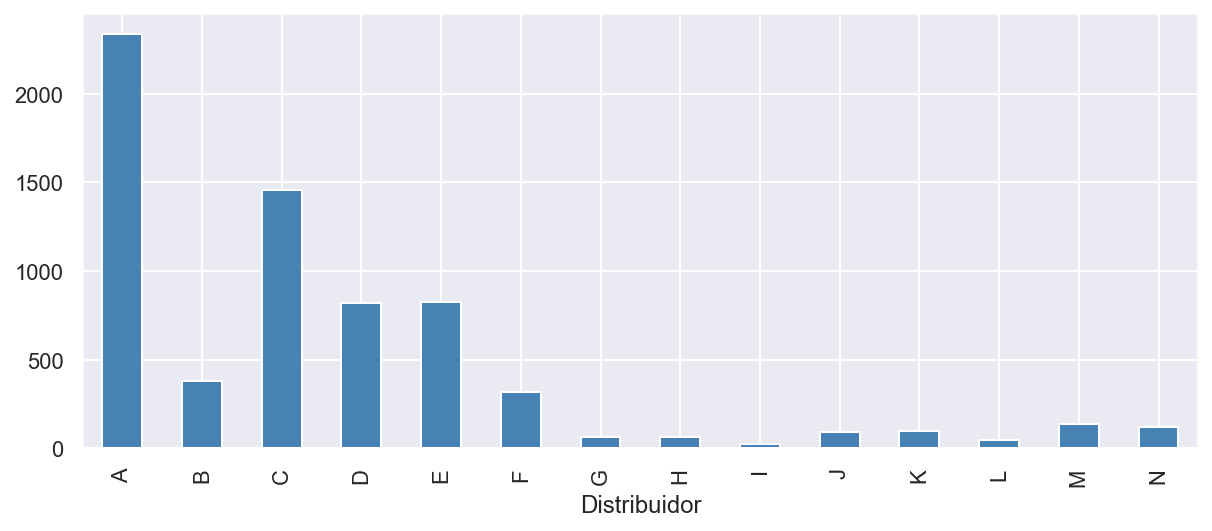

In [737]:
g_dist.plot(kind="bar",color='steelblue', figsize= (10,4))

Con estos datos y gráficas podemos notar que el distribuidor “A” es el que desplaza más unidades a través del tiempo, siguiéndole el “C”,”E” y “D”; las que desplazan menos piezas son las distribuidoras “I” y “L”. 

La distribuidora “A” tuve una venta extraordinaria en el mes de mayo del 2019 y su venta mínima fue en el mes de diciembre del mismo año que fue el mes en el que se desplazaron menos unidades en total.

En diciembre 2018 cuando se tuve una venta máxima 3 distribuidoras tuvieron su venta máxima (D,E & K)

Para una mejor observación de los datos, se divido la gráfica de distribuidoras por mayor y menor participación en las vemtas, en la primera podemos apreciar las distribuidoras que tienen una mayor participación  y en la segunda aquellas distribuidoras con poca participación.


In [699]:
maxdis = data_dist.loc[ : , ['A', 'B', 'C', 'D', 'E', 'F']]
mindis = data_dist.loc[ : , ['G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']]

Text(0.5, 1.0, 'Distribuidores con menos unidades desplazadas')

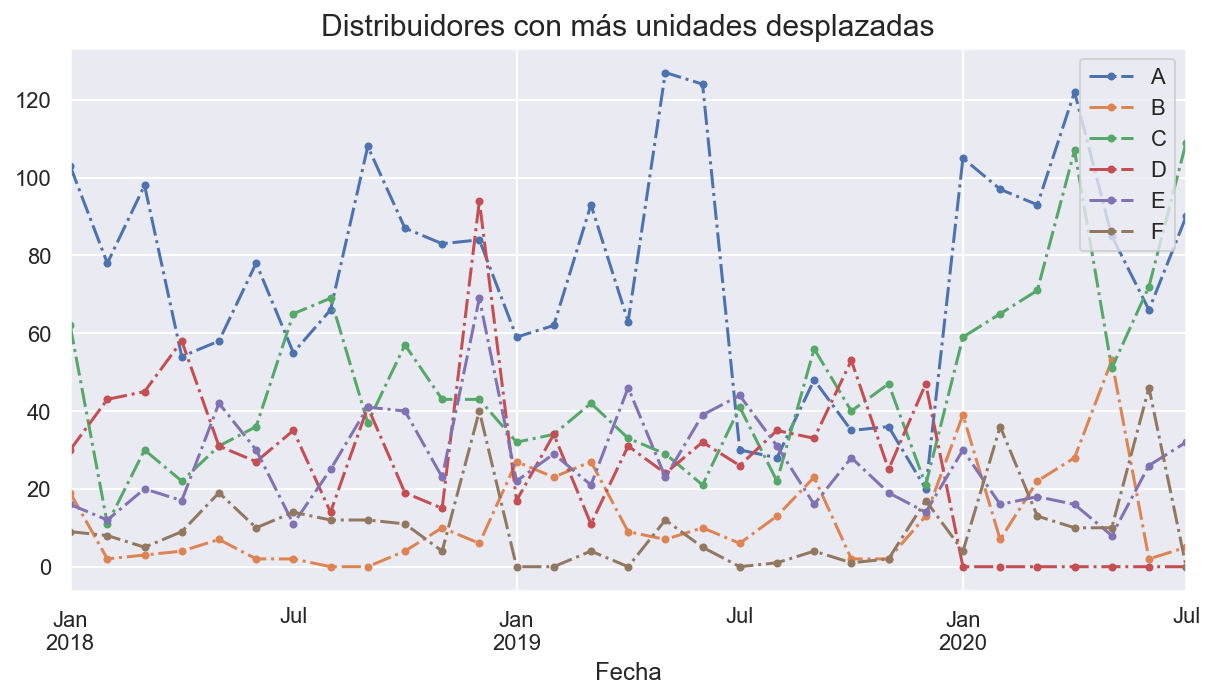

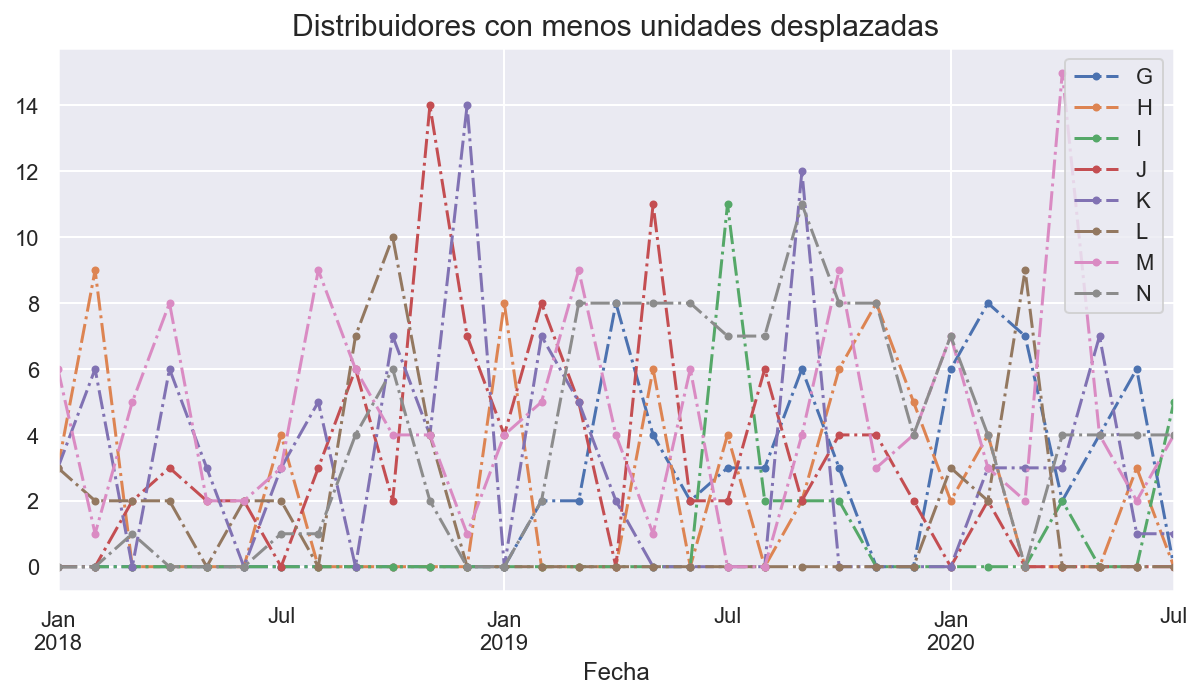

In [705]:

maxdis.plot(marker='.', linestyle='-.',figsize= (10,5))
plt.legend(loc = "upper right")
plt.title("Distribuidores con más unidades desplazadas",fontsize=15)

mindis.plot(marker='.', linestyle='-.',figsize= (10,5))
plt.legend(loc = "upper right")
plt.title("Distribuidores con menos unidades desplazadas",fontsize=15)


#### Estacionalidad

In [711]:
data_dist.index
data_dist['Mes'] = data_dist.index.month
data_dist['Año'] = data_dist.index.year

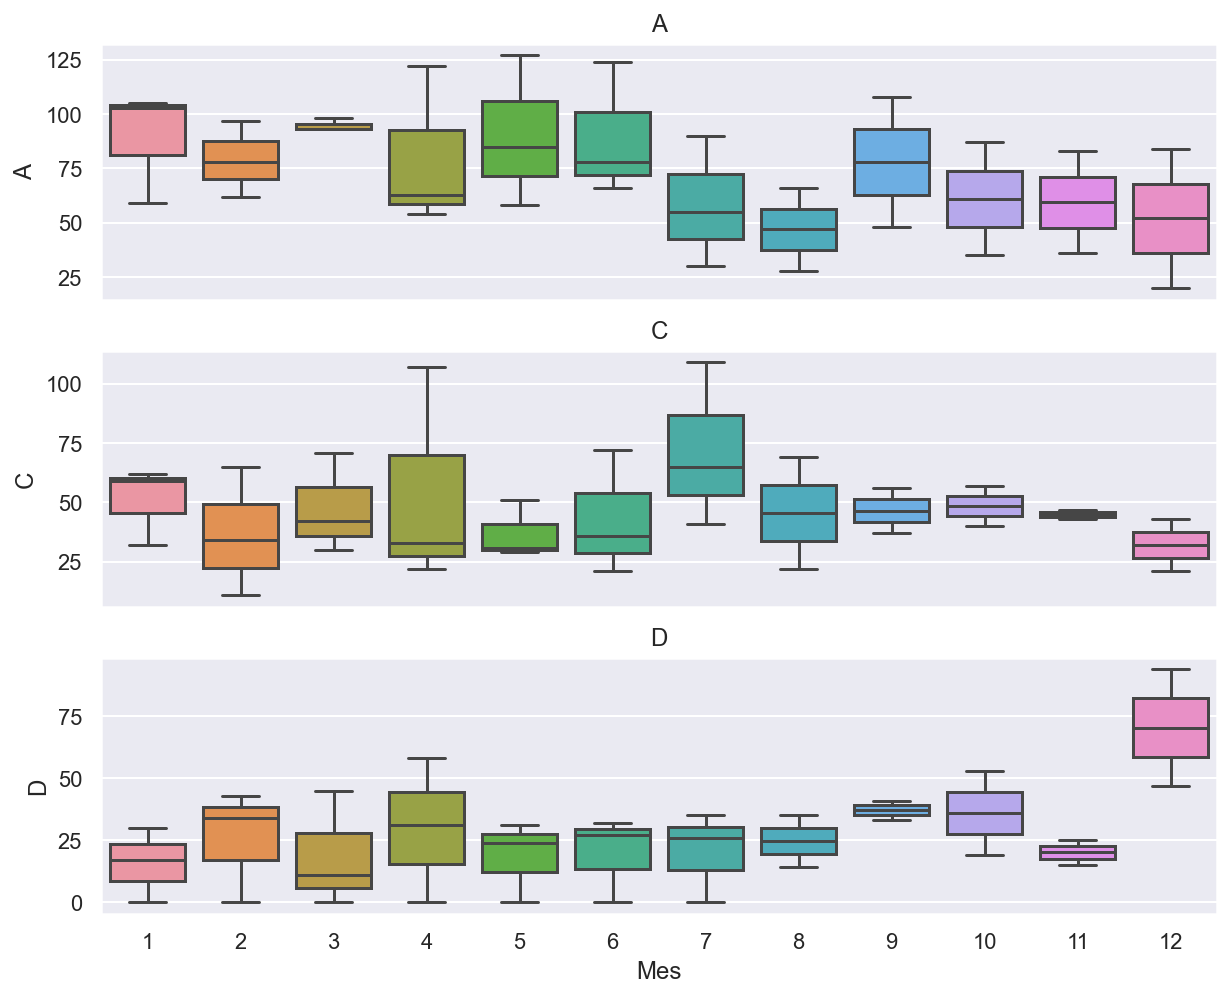

In [714]:

fig, ejes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
for nombre, eje in zip(['A','C','D'], ejes):
    sbn.boxplot(data=data_dist, x= 'Mes' ,y=nombre,ax=eje)
    eje.set_title(nombre)
    if eje != ejes[-1]:
        eje.set_xlabel('')


Se hizo este gráfico tomando las 3 primeras distribuidoras que desplazan más unidades para observar si había estacionalidad en sus ventas. 
* La distribuidora A tiene estacionalidad en los últimos 6 meses.
* El C tiene estacionalidad de Febrero a Junio y de Agosto a Noviembre.
* El D tiene estacionalidad de Julio a Agosto.



### Desplazamientos por Canal

In [978]:
data_canal = pd.read_csv("DATA CANAL.csv", encoding = "latin-1",index_col = 0)
data_canal.index = pd.to_datetime(data_canal.index)
data_canal.index.dtype

dtype('<M8[ns]')

In [969]:
data_canal.describe()

,DISTRIBUIDOR,HMO,HOSPITALES,NO APLICA,PARTICULAR,SGMM
count,31.000000,31.000000,30.000000,31.000000,14.000000,31.000000
mean,14.354839,68.064516,14.500000,26.870968,19.857143,86.419355
std,11.268092,33.410513,12.130753,16.479769,19.049963,23.283434
min,2.000000,17.000000,1.000000,4.000000,1.000000,42.000000
25%,7.500000,50.500000,8.250000,14.500000,2.250000,70.000000
50%,10.000000,63.000000,11.500000,18.000000,15.000000,87.000000
75%,16.000000,81.000000,16.750000,38.000000,33.500000,97.000000
max,56.000000,194.000000,65.000000,66.000000,51.000000,140.000000


In [741]:
data_canal.idxmin()

DISTRIBUIDOR   2018-09-01
HMO            2020-04-01
HOSPITALES     2018-03-01
NO APLICA      2019-07-01
PARTICULAR     2018-09-01
SGMM           2019-12-01
dtype: datetime64[ns]

In [751]:
data_canal.idxmax()

DISTRIBUIDOR   2020-01-01
HMO            2018-12-01
HOSPITALES     2018-12-01
NO APLICA      2020-07-01
PARTICULAR     2020-04-01
SGMM           2020-04-01
Mes            2018-12-01
Año            2020-01-01
dtype: datetime64[ns]

Podemos notar que las unidades se desplazan más por los canales de SGMM (seguros de gastos médicos) y por HMO´s (administradoras de salud), que en promedio se desplazan 86 unidades por SGMM y 68 por HMO´s.

Entonces podemos deducir que las ventas máximas totales que se dieron en Diciembre del 2018 pueden ser por el canal de HMO´s.

Las ventas mínimas totales coinciden con las ventas mínimas de las piezas desplazadas por SGMM.

También se observa que en promedio son 20 piezas las que se distribuyen por particulares. 



Text(0, 0.5, '')

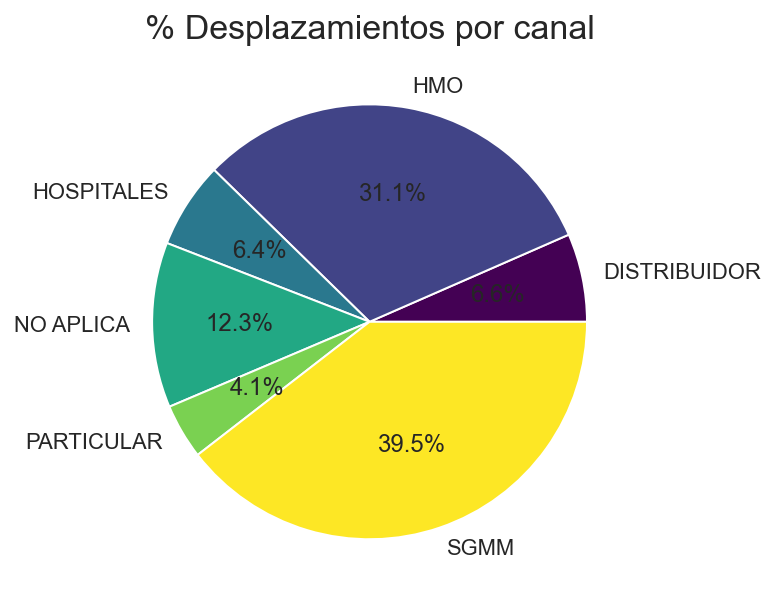

In [758]:
g_can.plot(kind="pie", x = 'Canal', autopct='%1.1f%%' ,colormap='viridis')
plt.title("% Desplazamientos por canal", fontsize=17)
plt.xlabel('')
plt.ylabel('')


Esta grafica nos permite ver porque canal se desplaza con mayor frecuencia el medicamento, se observa que este medicamento se compra más por personas que están aseguradas dado que las SGMM ocupan el 39.5% o por las personas que están afiliadas a alguna administradora de Salud, este ocupa el 31.1%.

Podemos ver que los particulares solo ocupan el 4.1% y estas son la personas que no están aseguradas, afiliadas a una administradora de Salud o van a un hospital para que sea recetado el producto.


#### Estacionalidad

Text(0.5, 1.0, 'Canales con más unidades desplazadas')

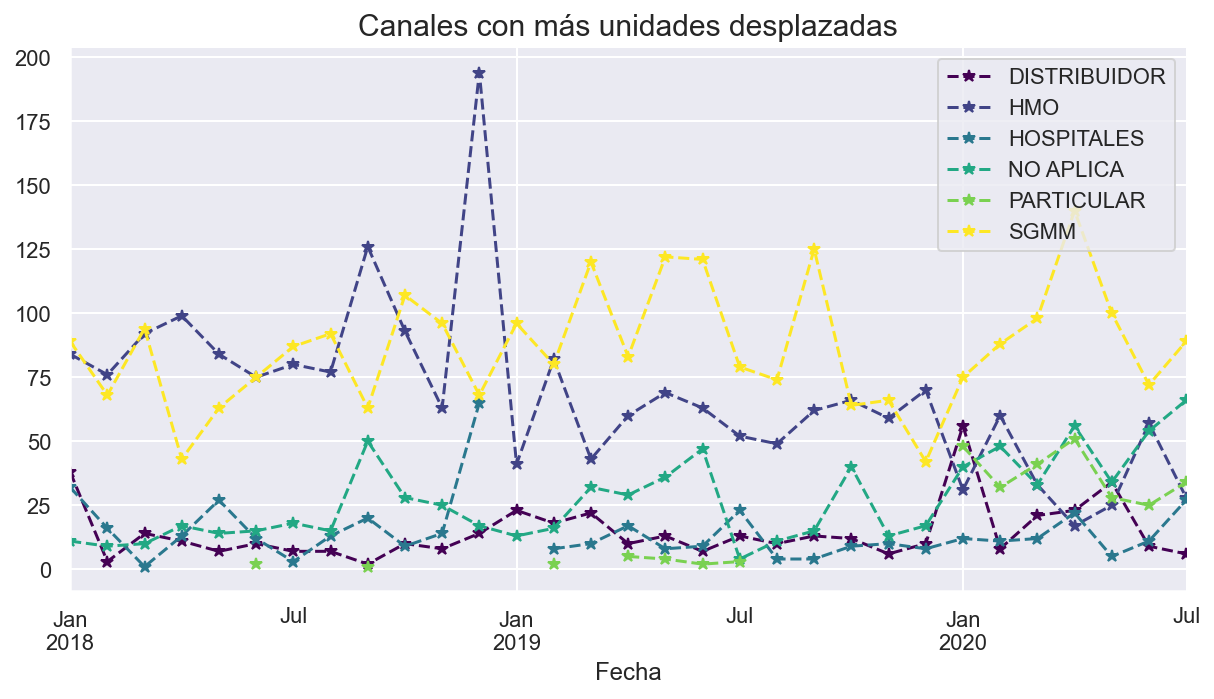

In [970]:
data_canal.plot(marker='*', linestyle='--', colormap='viridis',  figsize= (10,5) )
plt.legend(loc = "upper right")
plt.title("Canales con más unidades desplazadas",fontsize=15)


In [979]:
data_canal.index
data_canal['Mes'] = data_canal.index.month
data_canal['Año'] = data_canal.index.year

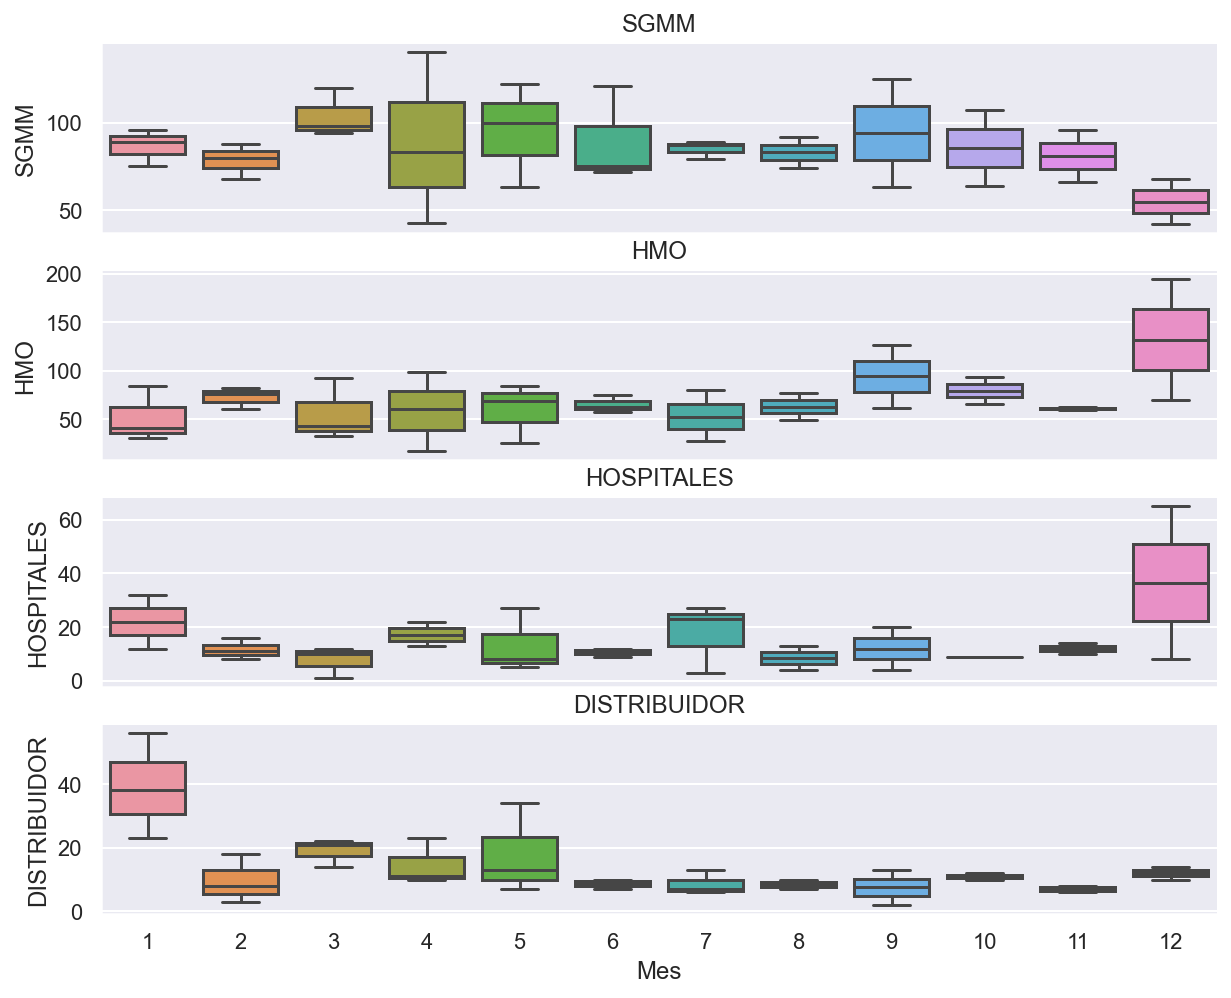

In [980]:
ig, ejes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
for nombre, eje in zip(['SGMM','HMO','HOSPITALES','DISTRIBUIDOR'], ejes):
    sbn.boxplot(data=data_canal, x= 'Mes' ,y=nombre,ax=eje)
    eje.set_title(nombre)
    if eje != ejes[-1]:
        eje.set_xlabel('')

Podemos observar que: 
* Las Distribuidoras tienen una estacionalidad a lo largo del tiempo y en enero siempre tiene más desplazamientos.
* Las aseguradoras tienen una estacionalidad de Julio a Noviembre.
* Los hospitales y las HMO´s tienen un crecimiento en los meses de Diciembre.



### Tendencia

Text(0.5, 1.0, 'Venta por Distribuidoras, Enero 2018 - Julio 2020')

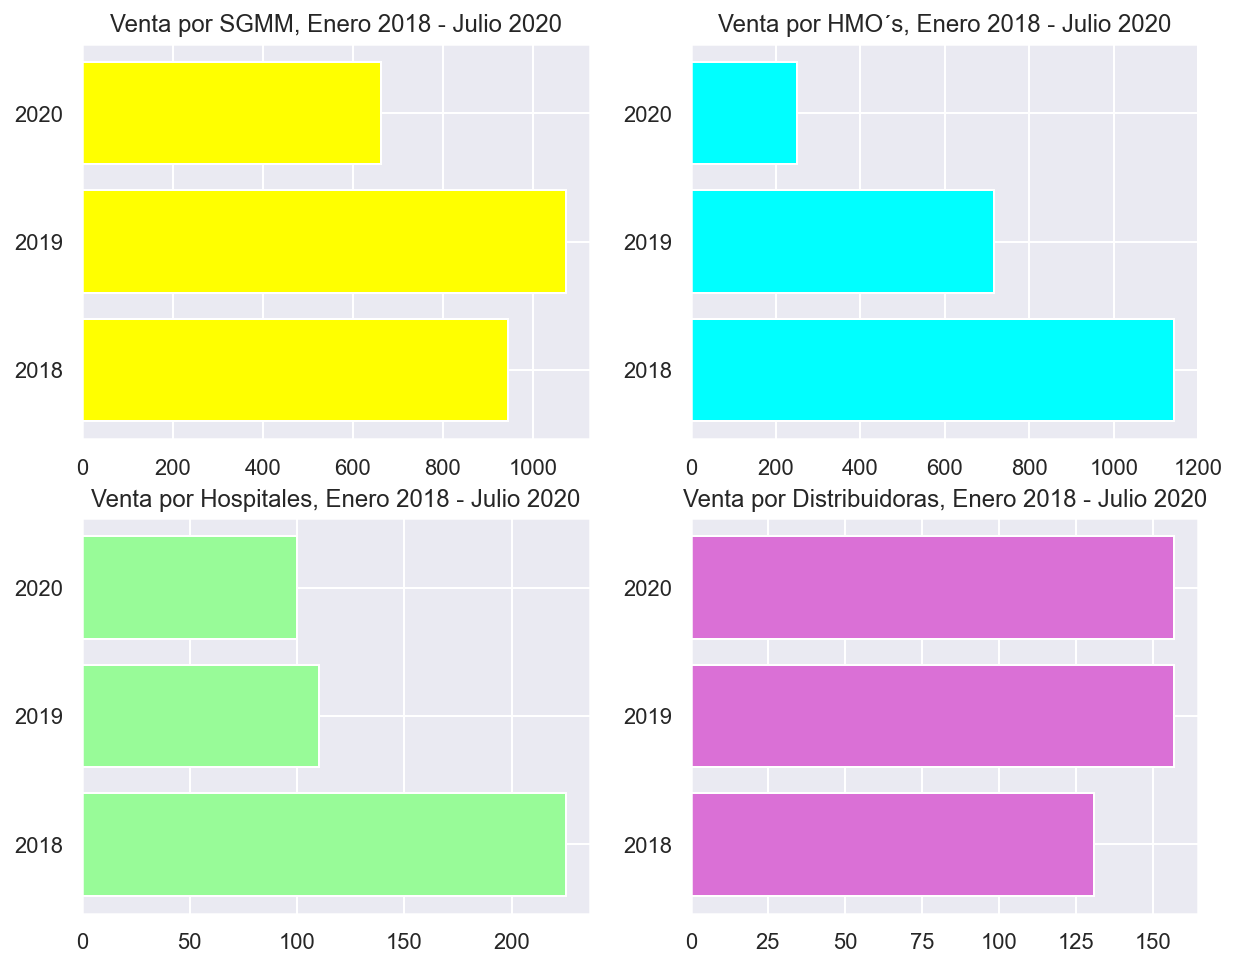

In [762]:
figure, ax = plt.subplots(2, 2, figsize= (10,8))
despxSGMM = data_canal["SGMM"].resample("M").sum()
despxHMO =  data_canal["HMO"].resample("M").sum()
despxHOSP=  data_canal["HOSPITALES"].resample("M").sum()
despxDIST=  data_canal["DISTRIBUIDOR"].resample("M").sum()


dxSGMM2018= despxSGMM["2018"].sum()
dxSGMM2019= despxSGMM["2019"].sum()
dxSGMM2020= despxSGMM["2020"].sum()

dxHMO2018= despxHMO["2018"].sum()
dxHMO2019= despxHMO["2019"].sum()
dxHMO2020= despxHMO["2020"].sum()

dxHOSP2018= despxHOSP["2018"].sum()
dxHOSP2019= despxHOSP["2019"].sum()
dxHOSP2020= despxHOSP["2020"].sum()


dxDIST2018= despxDIST["2018"].sum()
dxDIST2019= despxDIST["2019"].sum()
dxDIST2020= despxDIST["2020"].sum()


x = ['2018','2019','2020']
total_SGMM = [dxSGMM2018, dxSGMM2019,dxSGMM2020]
total_HMO = [dxHMO2018, dxHMO2019,dxHMO2020]
total_HOSP = [dxHOSP2018, dxHOSP2019,dxHOSP2020]
total_DIST = [dxDIST2018, dxDIST2019,dxDIST2020]


ax[0,0].barh(x, total_SGMM, color = "yellow")
ax[0,1].barh(x, total_HMO, color = "cyan")
ax[1,0].barh(x, total_HOSP, color = "palegreen")
ax[1,1].barh(x, total_DIST, color = "orchid")
ax[0,0].set_title("Venta por SGMM, Enero 2018 - Julio 2020")
ax[0,1].set_title("Venta por HMO´s, Enero 2018 - Julio 2020")
ax[1,0].set_title("Venta por Hospitales, Enero 2018 - Julio 2020")
ax[1,1].set_title("Venta por Distribuidoras, Enero 2018 - Julio 2020")




Cómo solo tenemos la información del primer semestre del 2020, analizamos la información con los dos años previos.
En el caso de las SGMM podemos ver que con los años van creciendo, esto puede ser por un aumento en las personas aseguradas, yo esperaría que este crecimiento continuara para el 2020.

Las HMO´s y los hospitales disminuyen del 2018 al 2019.

Para el caso de las Distribuidoras podemos notar que hay un aumento con los años, a pesar de no tener la información completa del 2020 se puede observar el aumento, ya que está a la par del 2019.


### Desplazamientos por Especialidad

Para el análisis de la especialidad se agruparán en una categoría llamada “Otras” aquellas que tengan menor o igual a 20 desplazamientos a lo largo de los 31 meses.


In [950]:
data_esp = pd.read_csv("DATA ESP.csv", encoding = "latin-1",index_col = 0)

In [910]:
data_esp.index = pd.to_datetime(data_esp.index)
data_esp.index.dtype

dtype('<M8[ns]')

In [911]:
data_esp.describe()

,ALERG,DERMA,HEMAT,MEDGEN,MEDINT,NEUMO,NEURO,PEDIA,TRAORT,OTROS,NOINDICA
count,31.000000,10.000000,9.000000,27.000000,31.000000,31.000000,15.00000,27.000000,16.000000,31.000000,31.000000
mean,30.580645,4.500000,8.222222,15.629630,14.870968,29.935484,4.60000,6.481481,5.250000,2.903226,112.387097
std,13.487708,1.840894,6.280481,12.502763,15.472000,16.241789,3.81351,4.098502,4.057914,3.718018,54.655697
min,11.000000,2.000000,1.000000,2.000000,4.000000,3.000000,2.00000,1.000000,1.000000,0.000000,38.000000
25%,22.000000,4.000000,2.000000,6.000000,6.000000,16.000000,3.00000,4.000000,3.000000,0.000000,71.500000
50%,28.000000,4.000000,8.000000,11.000000,10.000000,32.000000,4.00000,5.000000,3.000000,2.000000,98.000000
75%,38.000000,5.750000,13.000000,24.500000,16.000000,43.500000,4.00000,10.000000,7.000000,4.000000,146.000000
max,66.000000,8.000000,18.000000,38.000000,78.000000,63.000000,18.00000,15.000000,16.000000,16.000000,259.000000


In [912]:
data_esp.idxmin()

ALERG      2019-09-01
DERMA      2020-02-01
HEMAT      2019-03-01
MEDGEN     2019-07-01
MEDINT     2018-07-01
NEUMO      2020-03-01
NEURO      2018-04-01
PEDIA      2019-01-01
TRAORT     2018-07-01
OTROS      2018-03-01
NOINDICA   2018-02-01
dtype: datetime64[ns]

In [930]:
data_esp.idxmax()

ALERG      2019-06-01
DERMA      2018-10-01
HEMAT      2020-07-01
MEDGEN     2018-08-01
MEDINT     2018-03-01
NEUMO      2018-07-01
NEURO      2019-09-01
PEDIA      2018-05-01
TRAORT     2018-01-01
OTROS      2020-01-01
NOINDICA   2018-12-01
Mes        2018-12-01
Año        2020-01-01
dtype: datetime64[ns]

In [940]:
no_indica= data_esp["NOINDICA"].sum()
total= g_esp.sum()
no_indica/total

0.5138643067846608

In [942]:
otros = data_esp["OTROS"].sum()
total= g_esp.sum()
otros/total

0.01327433628318584

Podemos notar que los médicos que más recetan este medicamento son especialistas en alergias y neumólogos.

La media de los pediatras es de 6.48, esto es importante ya que esta enfermedad se da más en los niños menores a 5 años.


NOTA: cabe mencionar que este dato no lo tenemos en nuestra información en muchos registros, por lo tanto, el 51.38% se encuentra en el campo “NOINDICA” y el 1.32% está en el campo Otros.


#### Estacionalidad

Text(0.5, 1.0, 'Distribuidores con más unidades desplazadas')

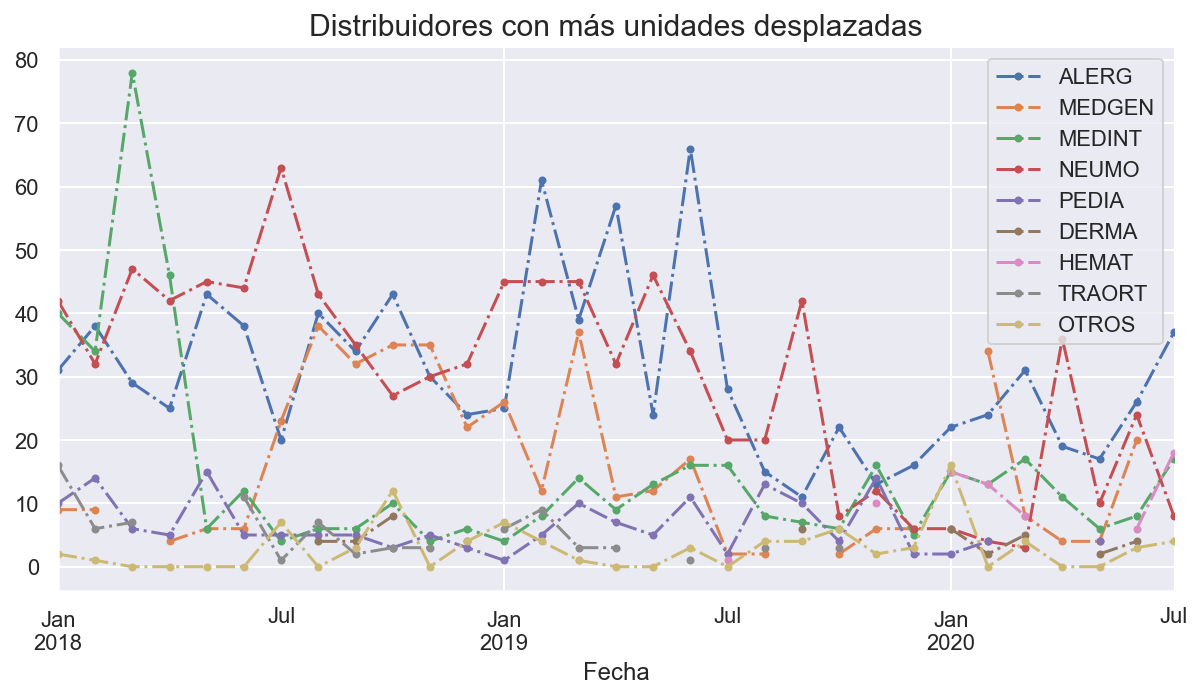

In [918]:
esp_altas = data_esp.loc[:,['ALERG','MEDGEN','MEDINT','NEUMO','PEDIA','DERMA','HEMAT','TRAORT','OTROS']]
esp_altas.plot(marker='.', linestyle='-.',figsize= (10,5))
plt.legend(loc = "upper right")
plt.title("Especialides con más unidades desplazadas",fontsize=15)


Dada la gráfica podemos deducir que no hay estacionalidad en los datos, para esta variable es difícil revisar las estacionalidades, ya que, una prescripción médica la puede dar cualquier doctor.


#### Tendencia

Text(0.5, 1.0, 'Venta por Neumologos, Enero 2018 - Julio 2020')

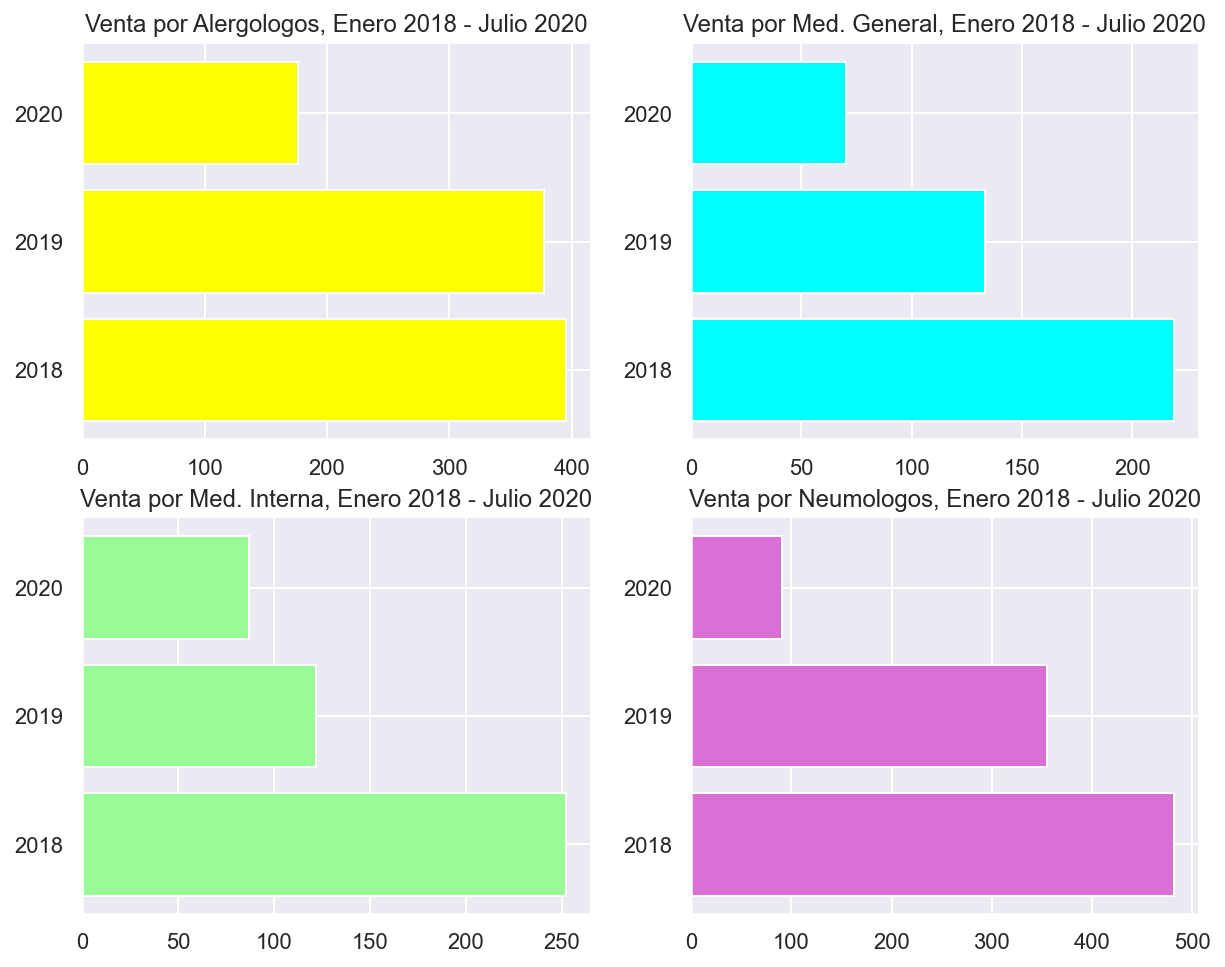

In [948]:
figure, ax = plt.subplots(2, 2, figsize= (10,8))
despxale = data_esp["ALERG"].resample("M").sum()
despxmedg =  data_esp["MEDGEN"].resample("M").sum()
despxmedi=  data_esp["MEDINT"].resample("M").sum()
despxneu=  data_esp["NEUMO"].resample("M").sum()


dxale2018= despxale["2018"].sum()
dxale2019= despxale["2019"].sum()
dxale2020= despxale["2020"].sum()

dxmedg2018= despxmedg["2018"].sum()
dxmedg2019= despxmedg["2019"].sum()
dxmedg2020= despxmedg["2020"].sum()

dxmedi2018= despxmedi["2018"].sum()
dxmedi2019= despxmedi["2019"].sum()
dxmedi2020= despxmedi["2020"].sum()


dxneu2018= despxneu["2018"].sum()
dxneu2019= despxneu["2019"].sum()
dxneu2020= despxneu["2020"].sum()


x = ['2018','2019','2020']
total_ale = [dxale2018, dxale2019,dxale2020]
total_medg = [dxmedg2018, dxmedg2019,dxmedg2020]
total_medi = [dxmedi2018, dxmedi2019,dxmedi2020]
total_neu = [dxneu2018, dxneu2019,dxneu2020]


ax[0,0].barh(x, total_ale, color = "yellow")
ax[0,1].barh(x, total_medg, color = "cyan")
ax[1,0].barh(x, total_medi, color = "palegreen")
ax[1,1].barh(x, total_neu, color = "orchid")
ax[0,0].set_title("Venta por Alergologos, Enero 2018 - Julio 2020")
ax[0,1].set_title("Venta por Med. General, Enero 2018 - Julio 2020")
ax[1,0].set_title("Venta por Med. Interna, Enero 2018 - Julio 2020")
ax[1,1].set_title("Venta por Neumologos, Enero 2018 - Julio 2020")



Estas gráficas nos muestran que para las 4 especialidades que se eligieron la tendencia es para abajo, sin embargo, esta variable, no es efectiva por el número de datos que nos faltas y por el proceso con el cual se obtienen estas especialidades.


### Desplazamientos por Estado

Para el análisis de Estado se agruparán en una categoría llamada “Otros” aquellos que tengan menor o igual a 60 desplazamientos a lo largo de los 31 meses.


In [998]:
data_esta = pd.read_csv("DATA ESTADO.csv", encoding = "latin-1",index_col = 0)
data_esta.index = pd.to_datetime(data_esta.index)
data_esta.index.dtype

dtype('<M8[ns]')

In [999]:
data_esta.describe()

,.NO ESPECIFICA,BAJA CALIFORNIA NORTE,CHIHUAHUA,CIUDAD DE MEXICO,GUANAJUATO,JALISCO,MEXICO,NUEVO LEON,SINALOA,VERACRUZ,YUCATAN,OTROS
count,31.000000,25.000000,25.000000,31.000000,29.000000,26.000000,31.000000,28.000000,18.000000,21.000000,31.000000,31.000000
mean,64.193548,9.320000,11.360000,66.322581,8.482759,7.461538,16.935484,18.071429,4.388889,3.095238,13.677419,5.741935
std,49.787829,5.588083,8.004582,24.681149,6.305444,5.427565,12.481815,17.619284,2.252812,1.921061,15.464771,4.106643
min,2.000000,1.000000,4.000000,14.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000
25%,37.000000,7.000000,6.000000,53.000000,4.000000,3.000000,5.500000,4.750000,3.000000,2.000000,6.000000,2.000000
50%,62.000000,9.000000,9.000000,63.000000,6.000000,6.000000,16.000000,11.500000,4.000000,3.000000,8.000000,6.000000
75%,85.500000,14.000000,13.000000,78.000000,12.000000,9.750000,23.000000,27.250000,5.750000,4.000000,15.000000,8.000000
max,252.000000,19.000000,31.000000,114.000000,24.000000,26.000000,43.000000,73.000000,9.000000,8.000000,78.000000,16.000000


In [1000]:
data_esta.idxmin()

.NO ESPECIFICA          2020-05-01
BAJA CALIFORNIA NORTE   2018-03-01
CHIHUAHUA               2018-11-01
CIUDAD DE MEXICO        2019-07-01
GUANAJUATO              2019-05-01
JALISCO                 2019-06-01
MEXICO                  2019-09-01
NUEVO LEON              2018-02-01
SINALOA                 2018-01-01
VERACRUZ                2018-01-01
YUCATAN                 2019-12-01
OTROS                   2018-05-01
dtype: datetime64[ns]

In [1001]:
data_esta.idxmax()

.NO ESPECIFICA          2018-12-01
BAJA CALIFORNIA NORTE   2020-06-01
CHIHUAHUA               2018-03-01
CIUDAD DE MEXICO        2020-04-01
GUANAJUATO              2019-06-01
JALISCO                 2020-04-01
MEXICO                  2020-02-01
NUEVO LEON              2020-07-01
SINALOA                 2020-04-01
VERACRUZ                2018-12-01
YUCATAN                 2018-03-01
OTROS                   2020-01-01
dtype: datetime64[ns]

In [993]:
na= data_esta['.NO ESPECIFICA'].sum()
total=g_est.sum()
na/total

0.2935103244837758

In [1002]:
otros=data_esta['OTROS'].sum()
otros/total

0.026253687315634218


Con lo realizado notamos que el estado donde más se vende este medicamento es en la Ciudad de México, con una media de 66 unidades.

El estado de México y Yucatán son los siguientes estados donde la veta es alta con una media de 16.93 y 13.67 respectivamente.

Las ventas mínimas de Yucatán coinciden con las fecha del minimo total y las ventas máximas totales coinciden con las de Veracruz, es posible que muchas piezas, se haya ido desplazado en este estado.


NOTA: cabe mencionar que este dato no lo tenemos en nuestra información en muchos registros, por lo tanto, el 29.35% se encuentra en el campo “.NO ESPECIFICA” y el 2.62% está en el campo Otros.


#### Estacionalidad

Text(0.5, 1.0, 'Estados con más unidades desplazadas')

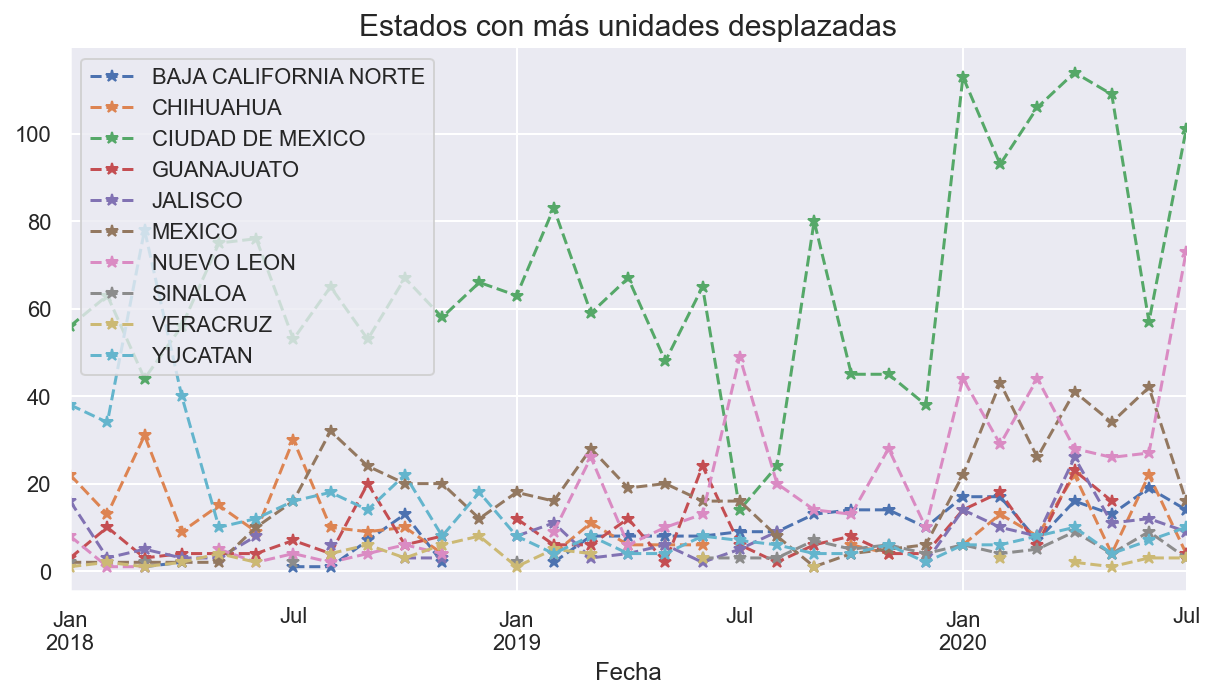

In [1009]:
estados = data_esta.loc[:,['BAJA CALIFORNIA NORTE','CHIHUAHUA','CIUDAD DE MEXICO','GUANAJUATO','JALISCO','MEXICO',
                           'NUEVO LEON','SINALOA','VERACRUZ','YUCATAN']]
estados.plot(marker='*', linestyle='--',  figsize= (10,5) )
plt.legend(loc = "upper left")
plt.title("Estados con más unidades desplazadas",fontsize=15)

In [1011]:
data_esta.index
data_esta['Mes'] = data_esta.index.month
data_esta['Año'] = data_esta.index.year

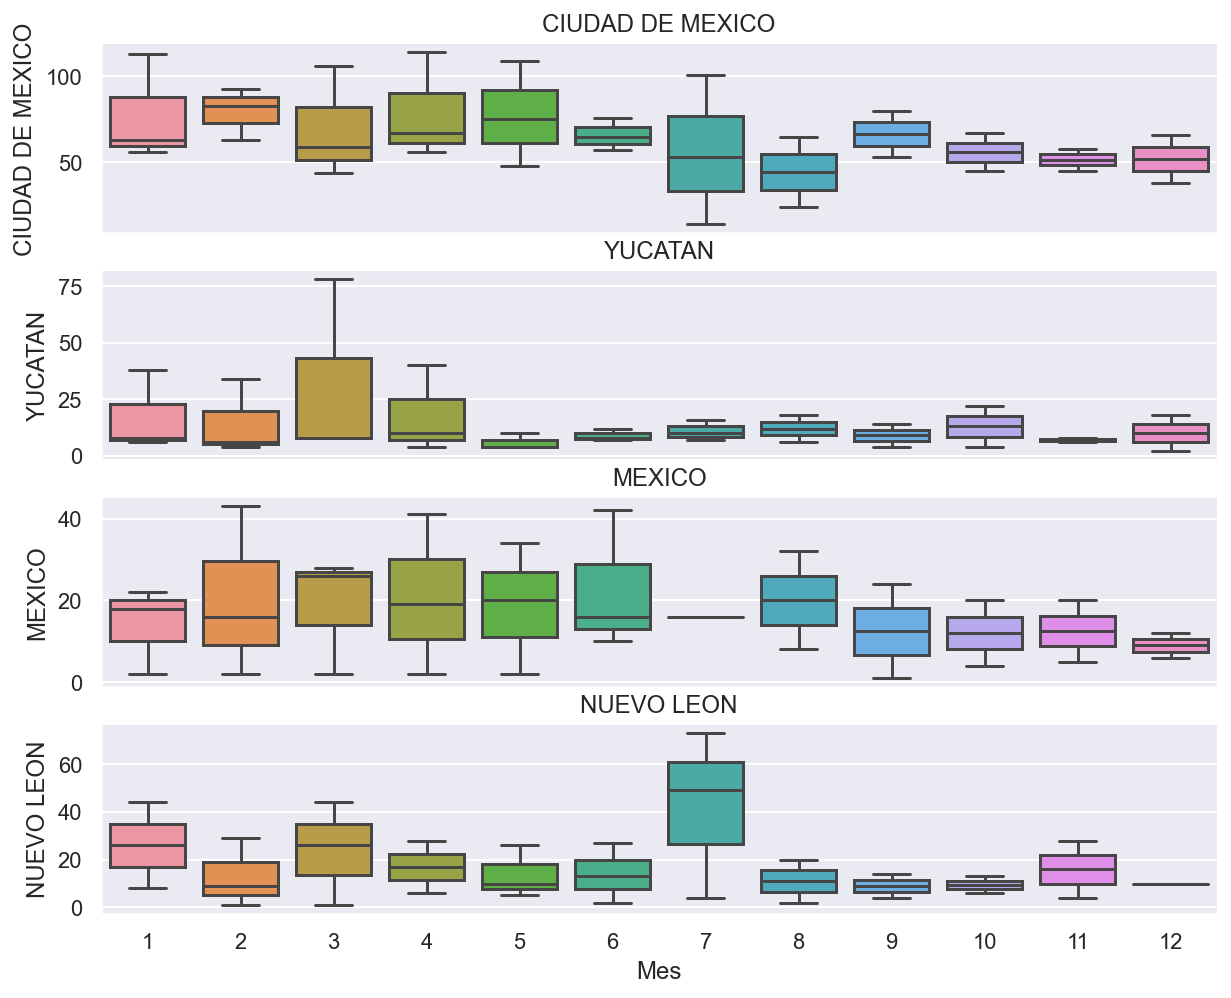

In [1012]:
ig, ejes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
for nombre, eje in zip(['CIUDAD DE MEXICO','YUCATAN','MEXICO','NUEVO LEON'], ejes):
    sbn.boxplot(data=data_esta, x= 'Mes' ,y=nombre,ax=eje)
    eje.set_title(nombre)
    if eje != ejes[-1]:
        eje.set_xlabel('')

Se tomaron los estados con mayores desplazamientos para ver si tenían estacionalidad.

Podemos notar que Yucatán, el Estado de México tiene una estacionalidad a lo largo del año.

La ciudad de México tiene estacionalidad en los meses de Febrero a Mayo

Y Nuevo León de Abril a Mayo y de Agosto a Octubre y en Julio tiene ventas altas.
